In [3]:
import pandas as pd





In [4]:
df= pd.read_csv("/content/Constraint_Train.csv")

In [5]:
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [7]:
df.shape

(6420, 3)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [10]:
# count the value  of labels
df['label'].value_counts()

real    3360
fake    3060
Name: label, dtype: int64

<BarContainer object of 2 artists>

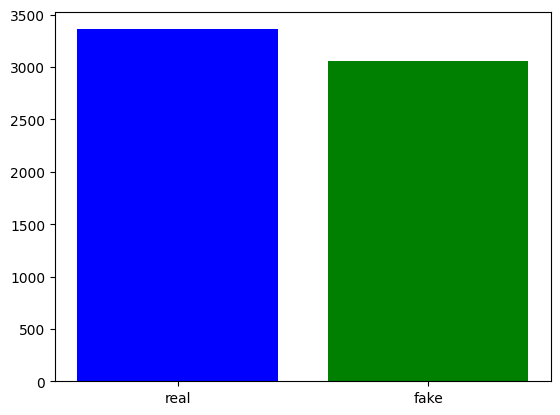

In [11]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
plt.bar(df['label'].value_counts().index,df['label'].value_counts(),color=['blue','green'])

In [12]:
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [13]:
# group by label
df1=df.groupby('label')['tweet'].count()
df1

label
fake    3060
real    3360
Name: tweet, dtype: int64

<BarContainer object of 2 artists>

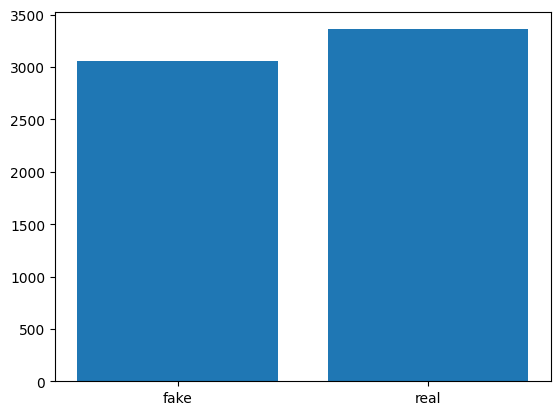

In [14]:
plt.bar(df1.index,df1)

In [15]:
# dummy variable on label
df['target']=pd.get_dummies(df['label'],drop_first=True)

In [16]:
df.head()

,id,tweet,label,target
0,1,The CDC currently reports 99031 deaths. In gen...,real,1
1,2,States reported 1121 deaths a small rise from ...,real,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,1
4,5,Populous states can generate large case counts...,real,1


In [17]:
df.drop(['label'],axis=1,inplace=True)

In [18]:
df.head()

,id,tweet,target
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1


In [19]:
# display df which has target 1
df2=df[df['target']==1]

<ipython-input-20-73cad769c373>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()
<ipython-input-20-73cad769c373>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True)


<Axes: >

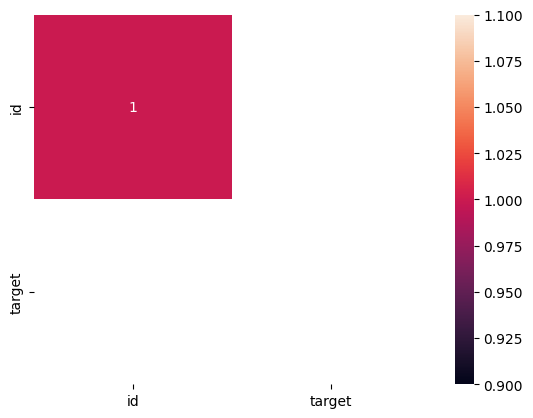

In [20]:
# correlation
df2.corr()
# plot the correlation
import seaborn as sns
sns.heatmap(df2.corr(),annot=True)

<ipython-input-21-4f7e07eddcc0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3=df.corr()


<Axes: >

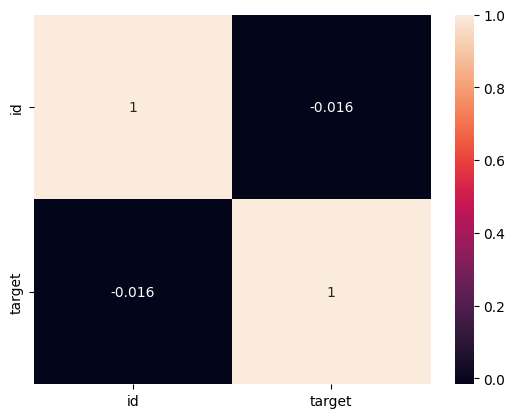

In [21]:
df3=df.corr()
sns.heatmap(df3,annot=True)

In [22]:
# independent and dependent features
x=df.drop(['target'],axis=1)
y=df['target']

In [23]:
x

,id,tweet
0,1,The CDC currently reports 99031 deaths. In gen...
1,2,States reported 1121 deaths a small rise from ...
2,3,Politically Correct Woman (Almost) Uses Pandem...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...
4,5,Populous states can generate large case counts...
...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...
6416,6417,???Autopsies prove that COVID-19 is??� a blood...
6417,6418,_A post claims a COVID-19 vaccine has already ...
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund


In [24]:
y

0       1
1       1
2       0
3       1
4       1
       ..
6415    0
6416    0
6417    0
6418    0
6419    1
Name: target, Length: 6420, dtype: uint8

In [25]:
message=x.copy()

In [26]:
message

,id,tweet
0,1,The CDC currently reports 99031 deaths. In gen...
1,2,States reported 1121 deaths a small rise from ...
2,3,Politically Correct Woman (Almost) Uses Pandem...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...
4,5,Populous states can generate large case counts...
...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...
6416,6417,???Autopsies prove that COVID-19 is??� a blood...
6417,6418,_A post claims a COVID-19 vaccine has already ...
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund


In [27]:
message['tweet'][0]

'The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.'

In [28]:
message.reset_index(inplace=True)

In [29]:
x.shape

(6420, 2)

In [30]:
y.shape

(6420,)

In [33]:
message.head()

,index,id,tweet
0,0,1,The CDC currently reports 99031 deaths. In gen...
1,1,2,States reported 1121 deaths a small rise from ...
2,2,3,Politically Correct Woman (Almost) Uses Pandem...
3,3,4,#IndiaFightsCorona: We have 1524 #COVID testin...
4,4,5,Populous states can generate large case counts...


In [34]:
# text preprocessing
import re
import nltk
from nltk.corpus import stopwords


In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(message)):
  review = re.sub('[^a-zA-Z]',' ',message['tweet'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus

In [50]:

import tensorflow as tf
tf.__version__

'2.15.0'

In [58]:
from keras.preprocessing.text import one_hot

In [59]:
voc_size=5000

In [60]:
one_hot_repr=[one_hot(words,voc_size)for words in corpus]

In [79]:
# word embedding
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Bidirectional
import numpy as np

In [75]:
sent_len=40
embedded_docs=pad_sequences(one_hot_repr,padding='post',maxlen=sent_len)
print(embedded_docs)

[[ 801 3625 3753 ...    0    0    0]
 [3229 3753  204 ...    0    0    0]
 [3667 2227 3691 ...    0    0    0]
 ...
 [1010  417 1567 ...    0    0    0]
 [3877 2104 1221 ...    0    0    0]
 [3910 4262 4300 ...    0    0    0]]


In [77]:
embedded_docs[0]

array([ 801, 3625, 3753,  204, 2210, 2335,  204,  990, 3643,  922, 3499,
       1153,  204, 3414,  693, 3520,  589,  200,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [78]:
# model creation
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_len))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [84]:
# Bidirectional LSTM
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_len))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 40, 40)            200000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 200)               112800    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313001 (1.19 MB)
Trainable params: 313001 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [81]:
X= np.array(embedded_docs)
Y=np.array(y)

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size=0.33,random_state=42)

In [86]:
model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=64)

Epoch 1/10
68/68 [==============================] - 17s 146ms/step - loss: 0.4849 - accuracy: 0.7652 - val_loss: 0.3549 - val_accuracy: 0.8631
Epoch 2/10
68/68 [==============================] - 6s 86ms/step - loss: 0.2096 - accuracy: 0.9261 - val_loss: 0.2417 - val_accuracy: 0.9018
Epoch 3/10
68/68 [==============================] - 4s 64ms/step - loss: 0.0892 - accuracy: 0.9712 - val_loss: 0.2803 - val_accuracy: 0.9028
Epoch 4/10
68/68 [==============================] - 3s 47ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.3170 - val_accuracy: 0.8929
Epoch 5/10
68/68 [==============================] - 3s 48ms/step - loss: 0.0255 - accuracy: 0.9930 - val_loss: 0.4303 - val_accuracy: 0.8905
Epoch 6/10
68/68 [==============================] - 2s 27ms/step - loss: 0.0108 - accuracy: 0.9972 - val_loss: 0.5481 - val_accuracy: 0.8863
Epoch 7/10
68/68 [==============================] - 1s 21ms/step - loss: 0.0174 - accuracy: 0.9953 - val_loss: 0.4145 - val_accuracy: 0.8773
Epoch 8/10


In [98]:
y_pred = (model1.predict(X_test) > 0.5).astype("int32")

67/67 [==============================] - 0s 3ms/step


In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[ 853,  151],
       [ 108, 1007]])

In [100]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred))

0.877772534214252
